(chap:5b-accounting)=
# 成長会計

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import py4macro

## はじめに

```{margin}
<div name="html-admonition">
Do you want to read in a differnt language? Start
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google" style="color:#ffffff;background-color:#008080;" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/><input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="translation" style="color:#ffffff;background-color:#008080;" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/>
in English or the language of your choice.
</div>
```

この章では次の問を考える。

> （問２）なぜ国々の経済成長率は大きく異なるのか？

この問を**成長会計**と呼ばれる手法を使って考察する。この手法も発展会計と同様に，一人当たりGDPの**変化率**（即ち、経済成長率）を全要素生産性と蓄積生産要素に分解し、それぞれの寄与度を考察することにより問２の「なぜ」を考える。

## 成長率について

$t$時点の生産関数を

$$
y_t=A_tk_t^a\left(h_tH_t\right)^{1-a}
$$

としよう。$t$時点と$t+1$時点の生産関数を使うと

$$
\frac{y_{t+1}}{y_t}=\frac{A_{t+1}}{A_t}
\left(\frac{k_{t+1}}{k_t}\right)^a
\left(\frac{h_{t+1}H_{t+1}}{h_tH_t}\right)^{1-a}
$$

となる。ここで

$$
1+g_x\equiv\frac{x_{t+1}}{x_t}
$$

とすると，$g_x$は$x$の成長率（例えば、0.02）である。これにより、

$$
    1+g_y=(1+g_A)(1+g_k)^a\left[(1+g_h)(1+g_H)\right]^{1-a}
$$

となり、対数化すると

$$
    \log(1+g_y)=\log(1+g_A)+a\log(1+g_k)+(1-a)\left[\log(1+g_h)+\log(1+g_H)\right]
$$

となる。また成長率が十分に小さい場合（例えば、0.02）、次式で近似することが可能となる。

$$
\log(1+g_x)\approx g_x
$$ (eq:gx_approx)

In [2]:
np.log(1+0.02)

0.01980262729617973

即ち、

$$
    g_y=g_A+ag_k+(1-a)(g_h+g_H)
$$

となる。

この式に基づき，成長会計，即ち，どの要素がどれだけ一人当たりGDPの成長率に貢献しているかを計算する訳だが，そのためには変数の平均成長率を計算する必要があるので，その計算方法について説明する。ある変数$x$が$n$年間$g_x$の率で成長したとしよう。初期の$x=x_0$に対する$n$年後の比率を考えると，次式が成立する。

$$
\frac{x_{n}}{x_{0}}=
\frac{x_1}{x_{0}}\cdot
\frac{x_2}{x_{1}}\cdot
\frac{x_3}{x_{2}}\cdot
\cdots
\frac{x_{n-2}}{x_{n-3}}\cdot
\frac{x_{n-1}}{x_{n-2}}\cdot
\frac{x_n}{x_{n-1}}
=(1+g_x)^{n}
$$ (eq:5-growth_average-expanded)

この式の両辺を$1/n$乗すると次式となる。

$$
\left(\frac{x_n}{x_0}\right)^{\frac{1}{n}}=1+g_x
$$

即ち，$1+g_x$は$\dfrac{x_n}{x_0}$の幾何平均であり，$g_x$が平均成長率である。

$$
g_x=
\left(
\dfrac{x_{n}}{x_{0}}
\right)^{\frac{1}{n}}-1
$$ (eq:5-growth_average)

この場合，算術平均ではなく幾何平均を使うことに注意しよう。また毎期毎期の成長率が違っても同じ結果[](eq:5-growth_average)は成立することも覚えておこう。

年間平均成長率を計算する場合，[](eq:5-growth_average-expanded)の両辺を対数化し式[](eq:gx_approx)の近似を使う方法もある。

$$
\begin{align*}
\ln\left(\frac{x_n}{x_0}\right)
&=\ln\left(1+g_x\right)^n \\
&\Downarrow
\end{align*}
$$

$$
g_x\approx\frac{1}{n}\ln\left(\frac{x_n}{x_0}\right)
$$ (eq:5-growth_average-2)

$g_x$が十分に小さい場合は，[](eq:5-growth_average)と[](eq:5-growth_average-2)のどちらを使っても大きな差は出ない。重要な点は，どちらかの一つの方法を計算の対象全てに一貫して使うことである。

例：$x_0=10$，$x_n=30$，$n=50$

In [3]:
x0 = 10
xn = 30
n  = 50

houhou1 = (xn/x0)**(1/n)-1
houhou2 = ( np.log(xn)-np.log(x0) )/n

print(f'方法１：{houhou1:}\n方法２：{houhou2}')

方法１：0.022215413278477092
方法２：0.02197224577336219


```{admonition} コードの説明
:class: dropdown

* `f`は以前説明した`f-string`である。`houhou1`と`houhou2`にそれぞれの値を代入している。
* `\n`は改行を意味する。
```

## 平均成長率の計算

まずPenn World Tableを読み込み，国リスを作成しよう

In [4]:
df = py4macro.data('pwt')
country_list = df.loc[:,'country'].unique()

データに含まれる次の変数を使う。
* `rgdpna`：実質GDP
    * 経済成長を考える上で適している
* `emp`：雇用者数
* `rkna`：物的資本サービス
* `hc`：人的資本の指標
    * 教育年数と教育の収益から計算されている

以下で計算する変数とは次のように対応している。
* 一人当たりGDP：$y_i\equiv\dfrac{Y_i}{L_i}=$ `rgdpna`/`emp`
* 一人当たり資本：$k_i\equiv\dfrac{K_i}{L_i}=$ `rkna`/`emp`
* 労働者一人当たり人的資本サービス：$h_iH_i=$ `avh`x`hc`
* 資本の所得シャア：$\alpha=1/3$（仮定）
* 蓄積生産要素の寄与：$k_i^{\alpha}\left(h_iH_i\right)^{1-\alpha}$
* 全要素生産性：$A_i=\dfrac{y_i}{k_i^{\alpha}\left(h_iH_i\right)^{1-\alpha}}$

それぞれの変数を計算しよう。

In [5]:
# 資本の所得シャア
a=1/3.0

# 一人当たりGDP
df['rgdp_pc'] = df['rgdpna'] / df['emp']

# 資本割合

df['k_pc'] = df['rkna'] / df['emp']

# 蓄積生産要素
df['factors'] = df['k_pc']**a * ( df['avh']*df['hc'] )**(1-a)

# 全要素生産性
df['tfp'] = df['rgdp_pc'] / df['factors']

これらの変数を使い，1999年から2019年の20年間の`rgdp_pc`、`k_pc`、`avh`，`hc`の平均成長率を計算する。次のコードを使うが`for`ループが二重（入れ子）になっている。

In [6]:
var_list = ['rgdp_pc','k_pc','avh','hc']   # 1

growth_dict = {}            # 2

for v in var_list:          # 3
    
    growth_list = []        # 4
    
    for c in country_list:  # 5
        start = 1999        # 6
        end = 2019          # 7
        n = end-start       # 8
        
        df_start = df.query('country == @c & year == @start')  # 9
        df_end = df.query('country == @c & year == @end')      # 10


        g = ( df_end[v].iat[0] / df_start[v].iat[0] )**(1/n)-1  # 11
        growth_list.append(100*g)                               # 12
            
    growth_dict[v] = growth_list                                # 13


df_growth = pd.DataFrame({'country':country_list,               # 14
                          'rgdp_pc':growth_dict['rgdp_pc'],     # 15
                          'k_pc':growth_dict['k_pc'],
                          'avh':growth_dict['avh'],
                          'hc':growth_dict['hc']})

```{admonition} コードの説明
:class: dropdown

1. 成長率を計算する対象となる変数リスト
2. 空の辞書。次の形になるように(1)の平均成長率のリストを格納する。
    * キー：変数名（`rgdp_pc`、`k_pc`、`hc`）
    * 値：それぞれの国の成長率からなるリスト
3. `var_list`に対しての`for`ループ。１回目のループでは`rdgp_pc`について計算する。
4. 空リスト（役割は以下で説明）
5. `country_list`に対しての`for`ループ。(3)の１回目の`for`ループで変数`rdgp_pc`に対して`country_list`にある国の成長率を下に続くコードを使って計算する。
6. 最初の年を指定
7. 最後の年を指定
8. 何年間かを計算
9. 最初の年の`DataFrame`を抽出
10. 最後の年の`DataFrame`を抽出
11. 平均成長率を計算する。
    * `df_end[v]`と`df_start[v]`は列ラベル`v`の列を抽出しており、`Series`として返される。
    * `.iat[0]`は`Series`の`0`番目の数値を取り出すメソッド
12. 計算した成長率を(4)のリストに追加する。
        * `100`をかけて％表示にする。
13. ループが終わると、(4)のリストを(2)の辞書に追加する。
    * 辞書に追加する際に変数名`v`を指定することにより、次のペアのデータが追加される
        * キー：変数名（`rgdp_pc`、`k_pc`、`hc`）
        * 値：それぞれの国の成長率のリスト
    * 3.の`for`ループの次の変数に移り、3.以下で説明した作業が繰り返される。
14. `country_list`を`DataFrame`の列に設定
15. `rgdp_pc`の成長率を`DataFrame`の列に設定するが，その際，`growth_dict['キー']`で`growth_dic`の`キー`にあるリストを抽出している。
    * 下の３行は`k_pc`，`avh`，`hc`に対して同じ作業を行なっている。
```

In [7]:
df_growth.head()

,country,rgdp_pc,k_pc,avh,hc
0,Aruba,-0.138189,2.924345,NaN,NaN
1,Angola,1.948414,-0.560107,NaN,0.734893
2,Anguilla,NaN,NaN,NaN,NaN
3,Albania,3.588328,NaN,NaN,0.387198
4,United Arab Emirates,-2.068514,NaN,NaN,0.335975


欠損値が含まれているので、`NaN`がある行は全て削除する。

In [8]:
df_growth = df_growth.dropna()

残った国数を確認してみよう。

In [9]:
len(df_growth)

60

`rgdp_pc`の成長率のヒストグラムをプロットするが，ここでは`DataFrame`のメソッド`plot()`を使う。まず使用する列を選んでメソッド`plot()`の引数に`kind='hist'`を指定するだけである。`bins=20`は階級（棒）の数を指定する引数（デフォルトは`10`）と理解すれば良いだろう。

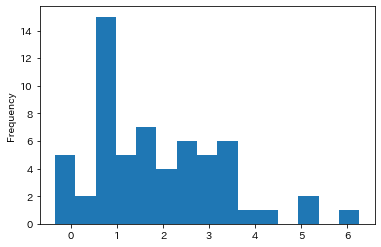

In [10]:
df_growth['rgdp_pc'].plot(kind='hist',bins=15)
pass

多くの国はプラスの経済成長を遂げているが，マイナイス成長の経済も存在する。平均成長率がマイナスの国数を計算してみよう。

In [11]:
len(df_growth.query('rgdp_pc < 0'))

5

最も平均成長率が低い経済の国名を探してみよう。

In [12]:
df_growth_sorted = df_growth.sort_values('rgdp_pc')
df_growth_sorted.head()

,country,rgdp_pc,k_pc,avh,hc
5,Argentina,-0.347174,0.208928,-0.794247,0.782819
84,Italy,-0.268447,0.512725,-0.423148,0.696057
102,Luxembourg,-0.031667,-0.309171,-0.277986,1.191794
52,Ecuador,-0.014519,0.094647,-0.708364,0.645785
109,Mexico,-0.000961,0.496348,-0.239539,0.747133


ここで使ったメソッド`sort_values()`は，引数の列を基準に昇順に並べ替える。引数に`ascending=False`を使うと，降順に並び替えることができる。

In [13]:
print( '上のヒストグラムで最も成長率が低い国は'
      f'{df_growth_sorted.iloc[0,0]}である。')

上のヒストグラムで最も成長率が低い国はArgentinaである。


## 蓄積生産要素の成長率

次に，下の式を使って蓄積生産要素の成長率を計算しよう。

$$
g_{\text{factors}}=ag_k+(1-a)(g_h+g_H)
$$

結果を`df_growth`に追加するが，その際、$a=\dfrac{1}{3}$と仮定する。

In [14]:
df_growth['factors'] = (1/3)*df_growth['k_pc']+(1-1/3)*( df_growth['avh']+df_growth['hc'] )

`factors`の成長率のヒストグラムを図示する。

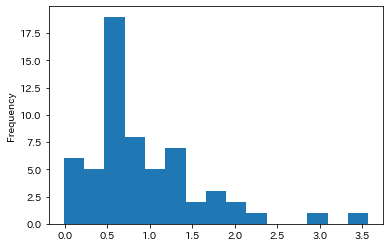

In [15]:
df_growth['factors'].plot(kind='hist',bins=15)
pass

マイナスの成長率の国数を調べてみよう。

In [16]:
len(df_growth.query('factors < 0'))

1

## 全要素生産性

全要素生産性は残差として計算される。

$$
g_A=g_y-g_{\text{factors}}
$$

In [17]:
df_growth['tfp'] = df_growth['rgdp_pc'] - df_growth['factors']

`tfp`の成長率のヒストグラムを図示してみよう。

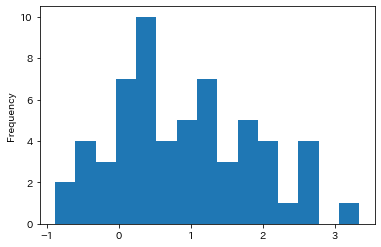

In [18]:
df_growth['tfp'].plot(kind='hist',bins=15)
pass

蓄積生産要素と比べると全要素生産性の成長率はよりマイナスに広がっている。TFP成長率がマイナスの国の数を確認してみよう。

In [19]:
len(df_growth.query('tfp < 0'))

10

蓄積要素生産性のマイナス成長率の国数と比べると10倍である。

## 全要素生産性と蓄積生産要素の貢献度

全要素生産性と蓄積生産要素のどちらが成長率に貢献しているのだろうか。まず図を使って比較してみよう。

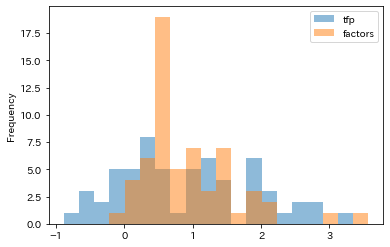

In [20]:
df_growth[['tfp','factors']].plot(kind='hist',bins=20,alpha=0.5)
pass

```{admonition} コードの説明
:class: dropdown
* ２つの列を選択することにより，同じ図に２つのヒストグラムが表示できるようになる。
* 引数`alpha`は図の透過度を指定する。0から1の間の値が指定可能で，デフォルトは1（透過なし）。
```

図から次のことがわかる。蓄積生産要素の成長率は正の値になる傾向がある。即ち，殆どの経済で蓄積生産要素による経済成長が起こっているということである。一方，全要素生産性の成長率はマイナスへの広がりがあり，成長を妨げる要因になっているようである。

次に，一人当たりGDPの成長率に対する全要素生産性の貢献度を数量化するが，２つの方法を考えよう。

### 方法１

全要素生産性の貢献度を次の式で計算する。

$$
100\times\frac{g_{A}}{g_y}
$$

In [21]:
df_growth['tfp_contribution'] = 100 * df_growth['tfp']/df_growth['rgdp_pc']

全要素生産性の貢献度が`50`％以上の国は何％かを計算する。

In [22]:
100 * len(df_growth.query('50<=tfp_contribution')) / len(df_growth)

56.666666666666664

In [23]:
from myst_nb import glue
tfp_contribution_more_than_50 = round(100 * len(df_growth.query('50<=tfp_contribution')) / len(df_growth),1)
glue("tfp_contribution_more_than_50", tfp_contribution_more_than_50,display=False)

56.7

約{glue:}`tfp_contribution_more_than_50`％の国で全要素生産性がより大きな貢献をしている。

### 方法２

２つ目の方法として発展会計で使った方法を考える。

$$
g_{yi} = g_{Ai} + g_{\text{factors},i}
$$

従って、分散を計算すると

$$
\text{Var}\left(g_{yi}\right)=
\text{Var}\left(g_{Ai}\right)+
\text{Var}\left(g_{\text{factors},i}\right)
+2\text{Cov}\left(g_{Ai},g_{\text{factors},i}\right)
$$

となり、次式を定義することができる。

$$
\begin{align*}
\text{全要素生産性の寄与度}&=
\dfrac{
    \text{Var}\left(g_{Ai}\right)+
    \text{Cov}\left(g_{Ai},g_{\text{factors},i}\right)
    }{
    \text{Var}\left(g_{yi}\right)
    } \\
\text{生産要素の寄与度}&=
\dfrac{
    \text{Var}\left(g_{\text{factors},i}\right)+
    \text{Cov}\left(g_{Ai},g_{\text{factors},i}\right)
    }{
    \text{Var}\left(g_{yi}\right)
    }    
\end{align*}
$$

これらの式に従って計算してみよう。

In [24]:
# それぞれの変数を設定
tfp_growth     = df_growth['tfp']
factors_growth = df_growth['factors']
rgdp_pc_growth = df_growth['rgdp_pc']

# 分散・共分散の計算
tfp_growth_var         = tfp_growth.var()
factors_growth_var     = factors_growth.var()
rgdp_pc_growth_var     = rgdp_pc_growth.var()
tfp_factors_growth_cov = np.cov(tfp_growth, factors_growth)[0,1]

**全要素生産性の寄与度**

In [25]:
(tfp_growth_var + tfp_factors_growth_cov) / rgdp_pc_growth_var

0.6120634566381635

**蓄積生産要素の寄与度**

In [26]:
(factors_growth_var+ tfp_factors_growth_cov) / rgdp_pc_growth_var

0.38793654336183664

蓄積生産要素と全要素生産性の寄与度は概ね6対4の割合でであることが確認できる。この結果は両変数の成長率のヒストグラムからも伺える。全要素生産性の方がより幅広く変化しているようである。いずれにしろ，蓄積生産要素と全要素生産性ともに一人当たりGDPの成長に大きく貢献していることが確認できる。

## 表の作成

結果を表としてまとめてみる。右端の列は方法１の結果を使っている。

In [27]:
country_table = ['Japan', 'United Kingdom','United States', 'Norway',
                'Singapore','Peru','India','China']

cond = df_growth['country'].isin(country_table)

col = ['country','rgdp_pc','factors','tfp','tfp_contribution']

df_growth.loc[cond,col].set_index('country') \
         .sort_values('rgdp_pc', ascending=False) \
         .round(2) \
         .rename(columns={'rgdp_pc':'一人当たりGDPの成長率',
                          'factors':'蓄積生産要素の成長率',
                          'tfp':'全要素生産性の成長率',
                          'tfp_contribution':'全要素生産性の寄与度(％)'})

,一人当たりGDPの成長率,蓄積生産要素の成長率,全要素生産性の成長率,全要素生産性の寄与度(％)
country,,,,
China,6.26,3.57,2.69,42.99
India,5.31,2.98,2.33,43.83
Peru,2.45,1.39,1.05,43.05
Singapore,1.73,1.86,-0.13,-7.48
United States,1.35,0.64,0.71,52.42
United Kingdom,0.78,0.49,0.29,36.96
Japan,0.63,0.12,0.51,80.75
Norway,0.61,0.61,0.00,0.20


ここでの全要素生産性の寄与度は，一人当たりGDPの成長率のうち何％がTFPによるものかを示している。この表を見ると，日本の全要素生産性の寄与度は非常に大きい。このデータは1999~2019年のデータであり，それ以前ではどうだったのかを含めて，次節では年代を区切って日本の経済成長を考察してみることにする。

## 日本

年代別に成長率を考えるために，次の関数を定義しよう。`start`から`end`までの間の平均成長率と全要素生産性の寄与度をリストとして返す。

In [28]:
def jp_growth_decomposition(start, end):
    """引数：
        start（int）: 開始年
        end（int）: 最終年
        
       返り値：次の変数の成長率とTFPの寄与度からなるリスト
                一人当たりGDP
                一人当たり物的資本
                平均労働時間
                人的資本
                全要素生産性（TFP）"""

    var_list = ['rgdp_pc','k_pc','avh','hc']
    
    start = start
    end = end
    n = end-start
    
    df_start = df.query('country == "Japan" & year == @start')
    df_end = df.query('country == "Japan" & year == @end')
    
    g_list = []
    
    
    # ========== var_listの変数の平均成長率を計算しg_listに追加する ==========
    for v in var_list:
        
        g = ( df_end[v].iat[0] / df_start[v].iat[0] )**(1/n)-1
        g_list.append(100*g)

        
    # ========== 蓄積生産要素の平均成長率を計算しg_listに追加する ==========
    factors = (1/3)*g_list[1]+(1-1/3)*( g_list[2]+g_list[3] )
    g_list.append(factors)

    
    # ========== 全要素生産性の平均成長率を計算しg_listに追加する ==========
    tfp = g_list[0]-factors
    g_list.append(tfp)

    # ========== 全要素生産性の寄与度を計算しg_listに追加する ==========
    tfp_contribution = 100*tfp/g_list[0]
    g_list.append(tfp_contribution)
    
    return g_list

この関数を使って`DataFrame`を作成する。

In [29]:
dic = {}                                          # 1

yr_list = ['1950s','1960s','1970s',               # 2
           '1980s','1990s','2000s','2010s']

for yr in yr_list:                                # 3
    start = int(yr[:4])                           # 4
    end = start+9                                 # 5
    dic[yr] = jp_growth_decomposition(start,end)  # 6


idx = ['gdp_pc_growth','k_pc_growth',             # 7
       'avh_growth','hc_growth','factors_growth',
       'tfp_growth','tfp_contribution']

df_jp = pd.DataFrame(dic, index=idx)              # 8
df_jp

,1950s,1960s,1970s,1980s,1990s,2000s,2010s
gdp_pc_growth,5.818810,8.574257,3.828061,3.638507,0.905053,0.220202,0.308059
k_pc_growth,NaN,11.263879,8.484514,4.983142,3.480964,1.046741,-0.272145
avh_growth,0.670331,-0.133080,-0.339988,-0.067591,-1.012446,-0.617680,-0.563402
hc_growth,1.265048,0.807691,0.711507,0.560457,0.516702,0.443183,0.303400
factors_growth,NaN,4.204367,3.075851,1.989625,0.829825,0.232582,-0.264049
tfp_growth,NaN,4.369890,0.752210,1.648882,0.075227,-0.012380,0.572108
tfp_contribution,NaN,50.965232,19.649905,45.317542,8.311944,-5.622092,185.713890


````{admonition} コードの説明
:class: dropdown

1~6のコードは次のコードを`for`ループとして書いている。
```
dic = {'1950s':jp_growth_decomposition(1950,1959),
       '1960s':jp_growth_decomposition(1960,1969),
       '1970s':jp_growth_decomposition(1970,1979),
       '1980s':jp_growth_decomposition(1980,1989),
       '1990s':jp_growth_decomposition(1990,1999),
       '2000s':jp_growth_decomposition(2000,2010),
       '2010s':jp_growth_decomposition(2010,2019)}

```
1. 空の辞書`dic`を作成する。
2. `dic`のキーになる値のリストを作成する。
3. `yr_list`に対しての`for`ループ。
4. 関数`jp_growth_decomposition()`の引数として使用する開始年を作成する。
    * 右辺の`yr`は5つの文字からなる文字列であり，`yr[:4]`は最初の4文字を抽出する。それを整数に変換するために`int()`を使っている。
    * 右辺の開始年を変数`start`に割り当てる。
5. 関数`jp_growth_decomposition()`の引数として使用する最終年を作成する。
    * 右辺では`start`の9年後を最終年としている。
    * 右辺の最終年を変数`end`に割り当てる。
6. `dic`のキー`yr`に対応する値として`jp_growth_decomposition(start,end)`の返り値を`設定する。
7. (8)で`DataFrame`を作成するが，その行ラベルに使うリストを作成する。
8. `dic`を使い`DataFrame`を作成する。
````

値を確認するだけであればこのままでも良いが，棒グラフを作成するために列と行を入れ替えることにする。`df_jp`のメソッド`.transpose()`を使う。

In [30]:
df_jp = df_jp.transpose()
df_jp

,gdp_pc_growth,k_pc_growth,avh_growth,hc_growth,factors_growth,tfp_growth,tfp_contribution
1950s,5.818810,NaN,0.670331,1.265048,NaN,NaN,NaN
1960s,8.574257,11.263879,-0.133080,0.807691,4.204367,4.369890,50.965232
1970s,3.828061,8.484514,-0.339988,0.711507,3.075851,0.752210,19.649905
1980s,3.638507,4.983142,-0.067591,0.560457,1.989625,1.648882,45.317542
1990s,0.905053,3.480964,-1.012446,0.516702,0.829825,0.075227,8.311944
2000s,0.220202,1.046741,-0.617680,0.443183,0.232582,-0.012380,-5.622092
2010s,0.308059,-0.272145,-0.563402,0.303400,-0.264049,0.572108,185.713890


1950年代に欠損値があるが，そのまま議論を進めよう。まず一人当たりGDP成長率`gdp_pc_growth`を棒グラフとして表示してみよう。表示したい列を選択し，引数に`kind='bar'`を選択するだけである。

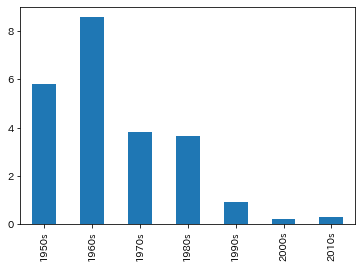

In [31]:
df_jp['gdp_pc_growth'].plot(kind='bar')
pass

1960年代をピークに成長率は下降線をたどっている。

次にヒストグラムに異なる変数を並べて表示してみる。この場合も、表示したい変数を先に選び`kind='bar'`を指定するだけである。

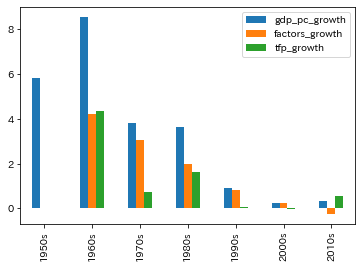

In [32]:
df_jp.iloc[:,[0,-3,-2]].plot(kind='bar')
pass

以下では，全要素生産性と蓄積生産要素の成長率に焦点を当てるので，`dropna()`を使って1950年代のデータは削除する。

In [33]:
df_jp = df_jp.dropna()

上の棒グラフで，引数`stacked=True`を設定すると棒を積み重ねて表示することができる。

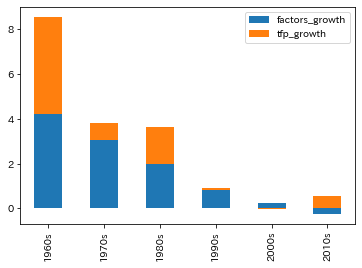

In [34]:
df_jp.iloc[:,[-3,-2]].plot(kind='bar', stacked=True)
pass

次のグラフでは，一人当たりGDPの線グラフと一緒に表示している。

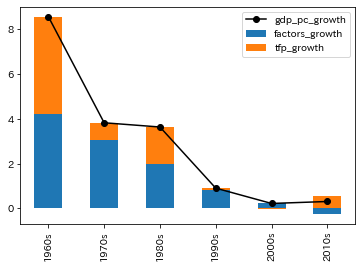

In [35]:
ax_ = df_jp.iloc[:,0].plot(marker='o',color='k', legend=True)
df_jp.iloc[:,[-3,-2]].plot(kind='bar', stacked=True, legend=True, ax=ax_)
pass

1990年代に入ると，それ以前と比べて全要素生産性の成長率の下落が著しく，一人当たりGDPの成長率に大きく影響している。「失われた10年」の原因と主張する研究者もいる。